<a href="https://colab.research.google.com/github/kite213/data-science/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



from google.colab import files
uploaded=files.upload()


import pandas as pd
data=pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv',skiprows=4)
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv to API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
                    Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL 

/tmp/ipython-input-17-2039524946.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


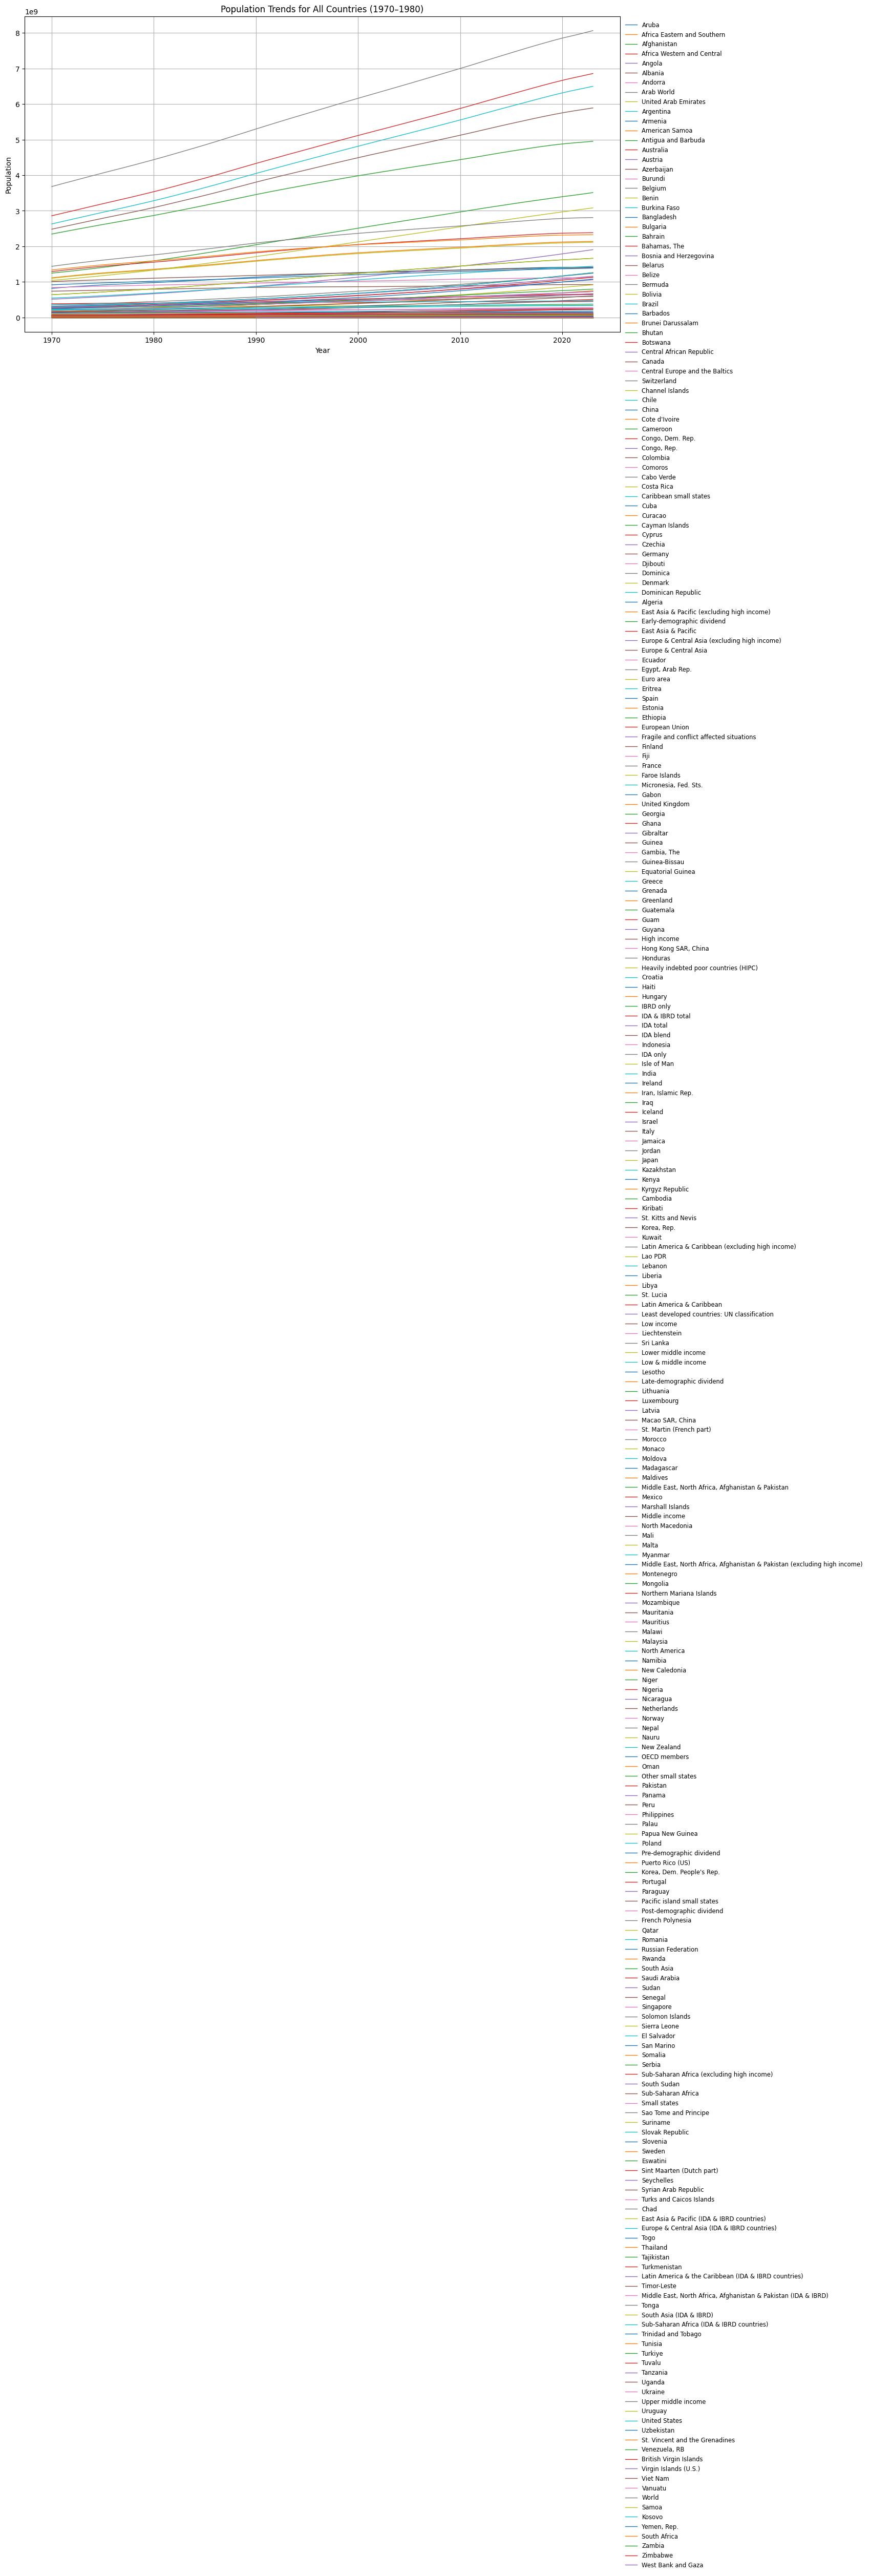

In [ ]:

df = pd.DataFrame(data)

years = [str(y) for y in range(1970,2024)]
columns_to_keep = ['Country Name'] + years
df_decade = df[columns_to_keep]

df_melted = df_decade.melt(id_vars='Country Name', var_name='Year', value_name='Population')
df_melted['Year'] = df_melted['Year'].astype(int)

df_melted = df_melted.dropna()
df_melted = df_melted[df_melted['Population'] > 0]

plt.figure(figsize=(15, 8))

for country in df_melted['Country Name'].unique():
    country_data = df_melted[df_melted['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country, linewidth=1)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends for All Countries (1970–1980)')
plt.grid(True)
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1), ncol=1, frameon=False)
plt.tight_layout()
plt.show()

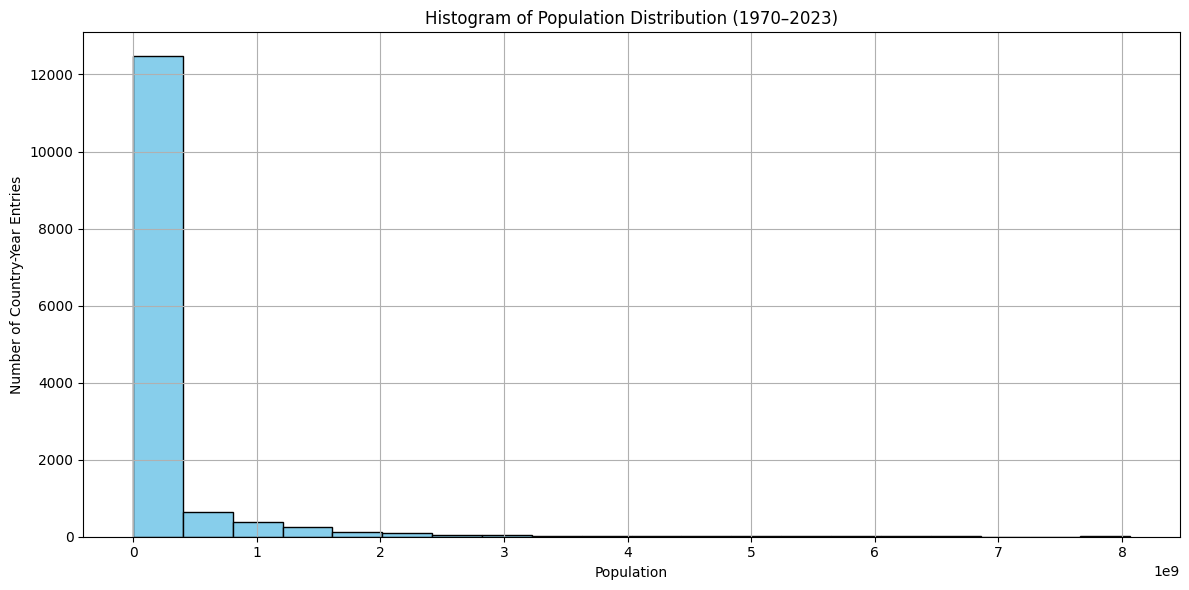

In [ ]:

df = pd.DataFrame(data)

years = [str(y) for y in range(1970, 2024)]
columns_to_keep = ['Country Name'] + years
df_decade = df[columns_to_keep]

df_melted = df_decade.melt(id_vars='Country Name', var_name='Year', value_name='Population')
df_melted['Year'] = df_melted['Year'].astype(int)

df_melted = df_melted.dropna()
df_melted = df_melted[df_melted['Population'] > 0]


plt.figure(figsize=(12, 6))
plt.hist(df_melted['Population'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Number of Country-Year Entries')
plt.title('Histogram of Population Distribution (1970–2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-21-4004689840.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', len(chunk))


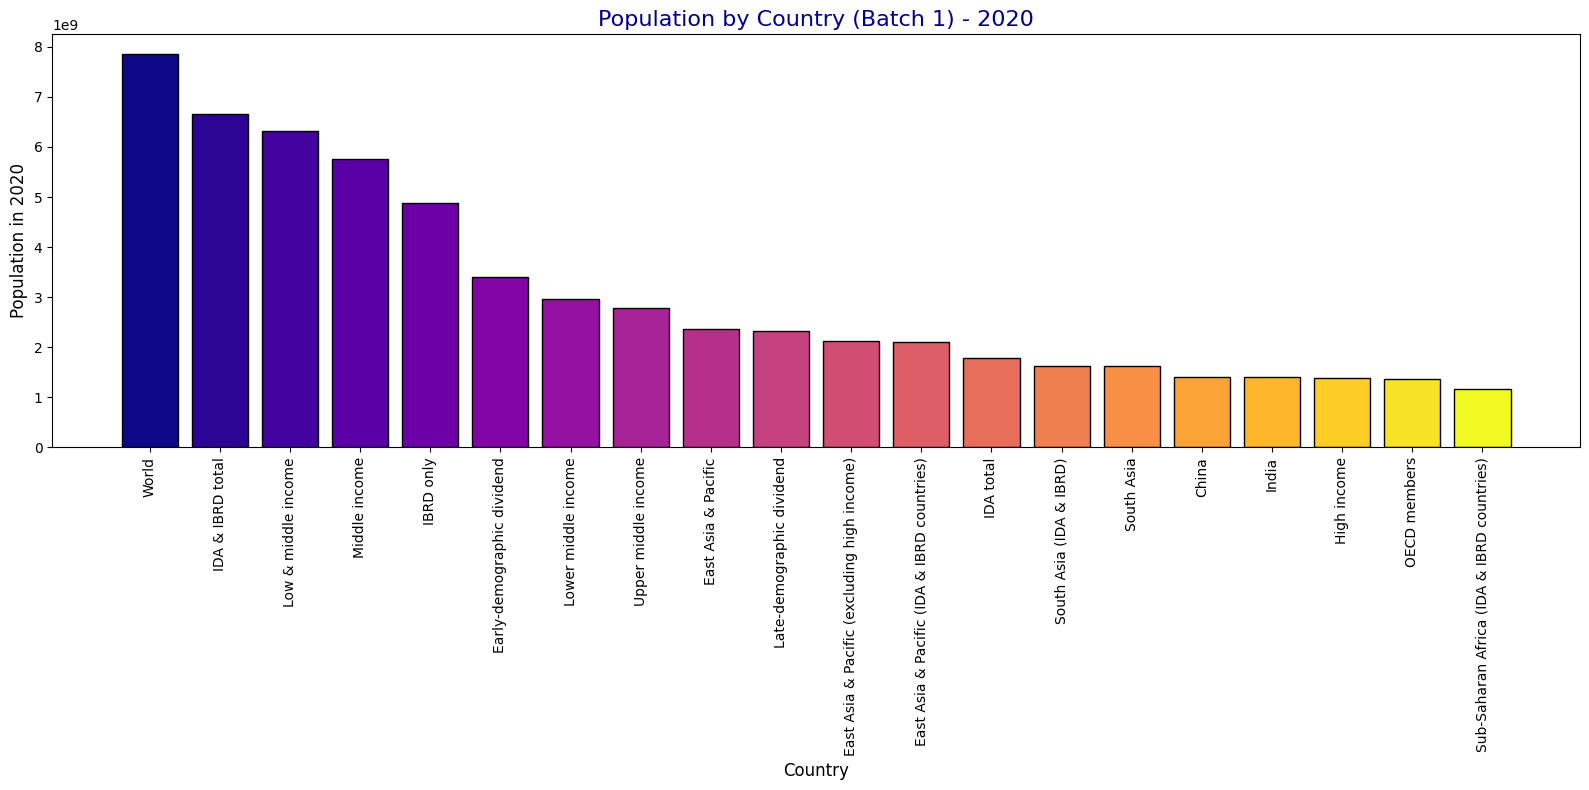

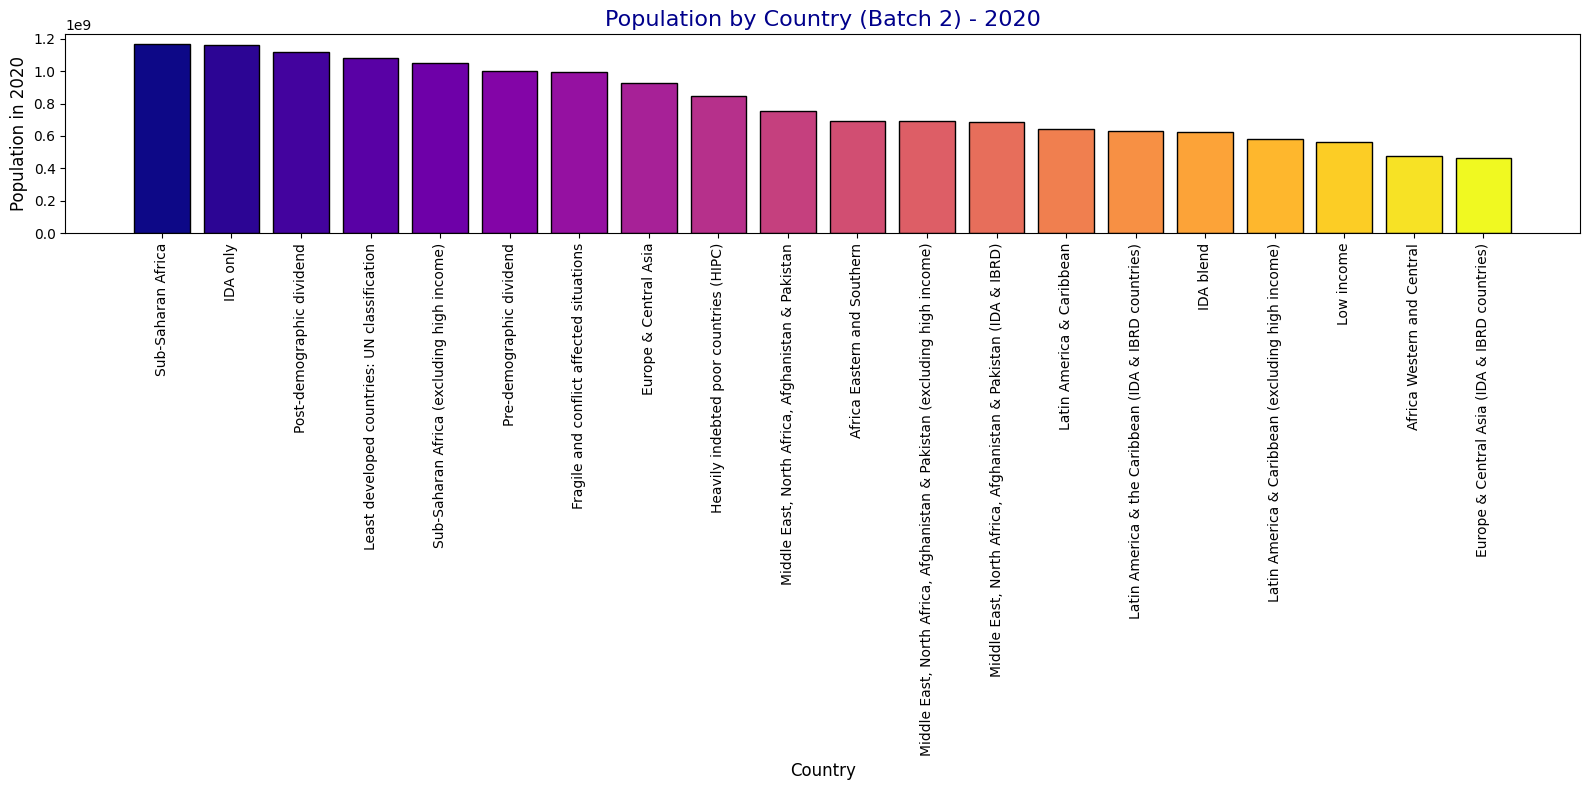

/tmp/ipython-input-21-4004689840.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', len(chunk))


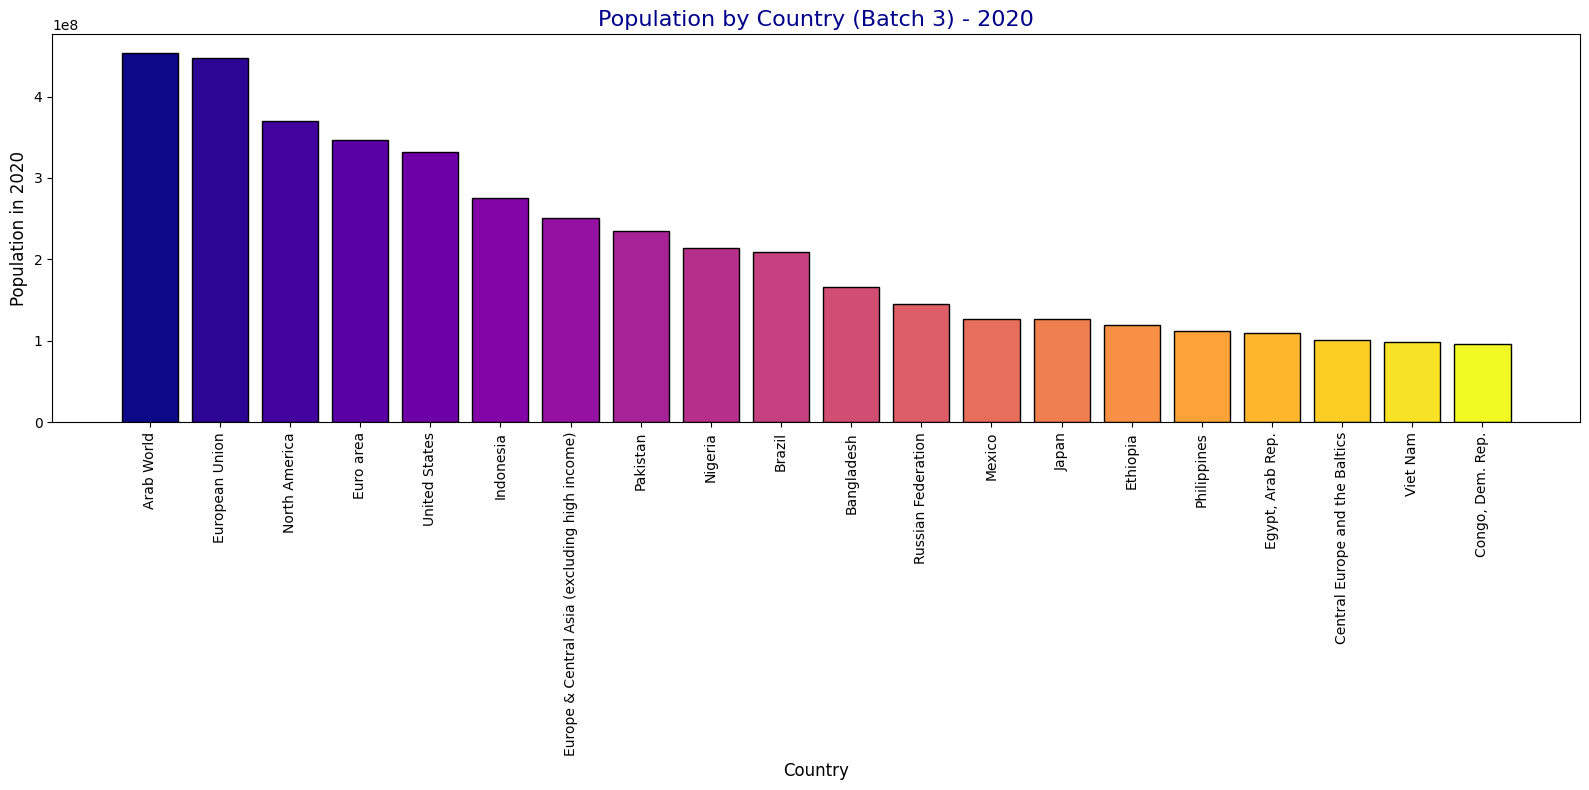

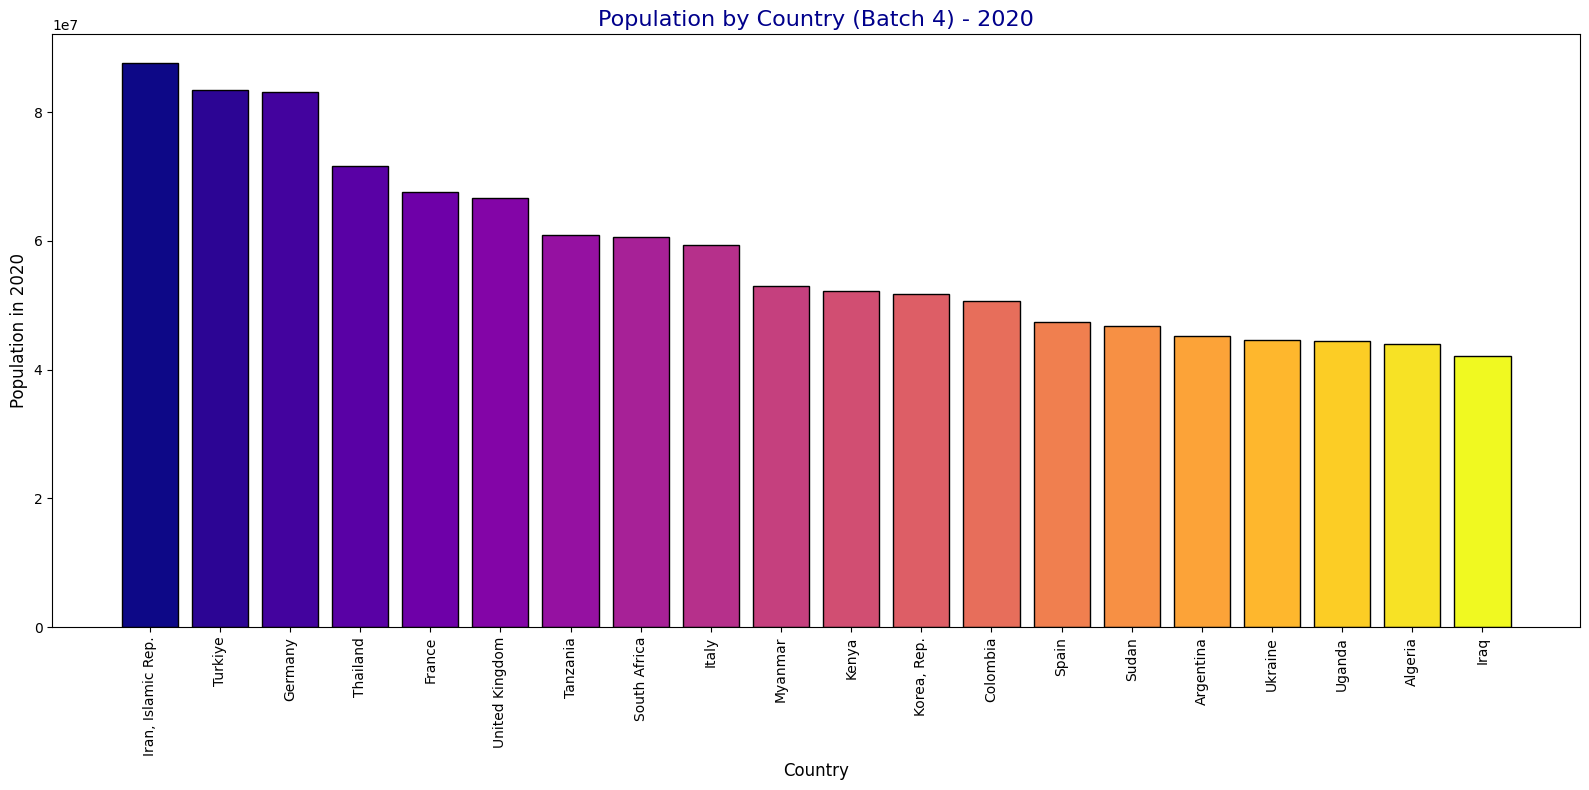

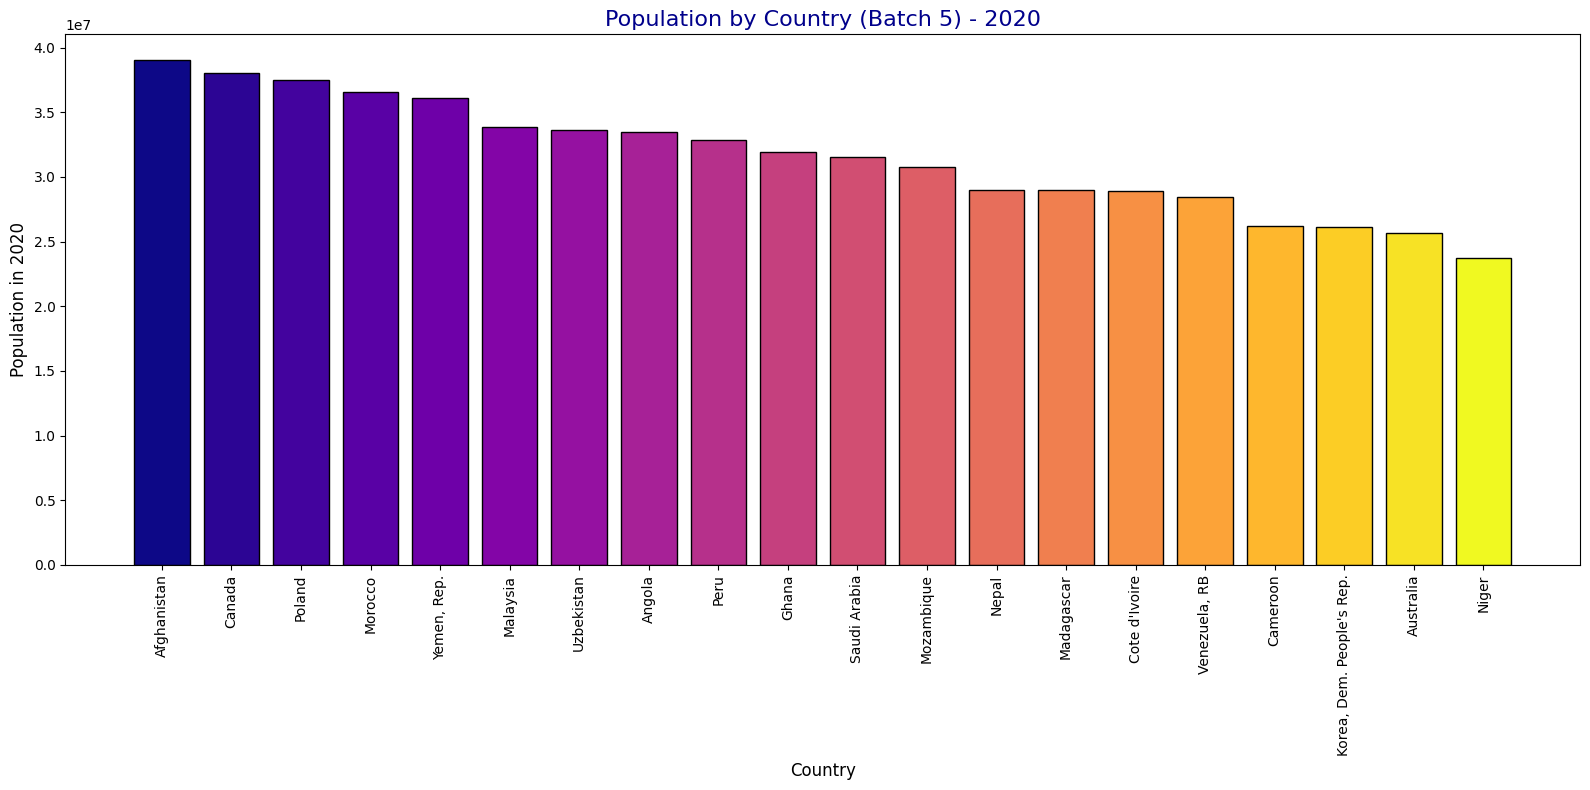

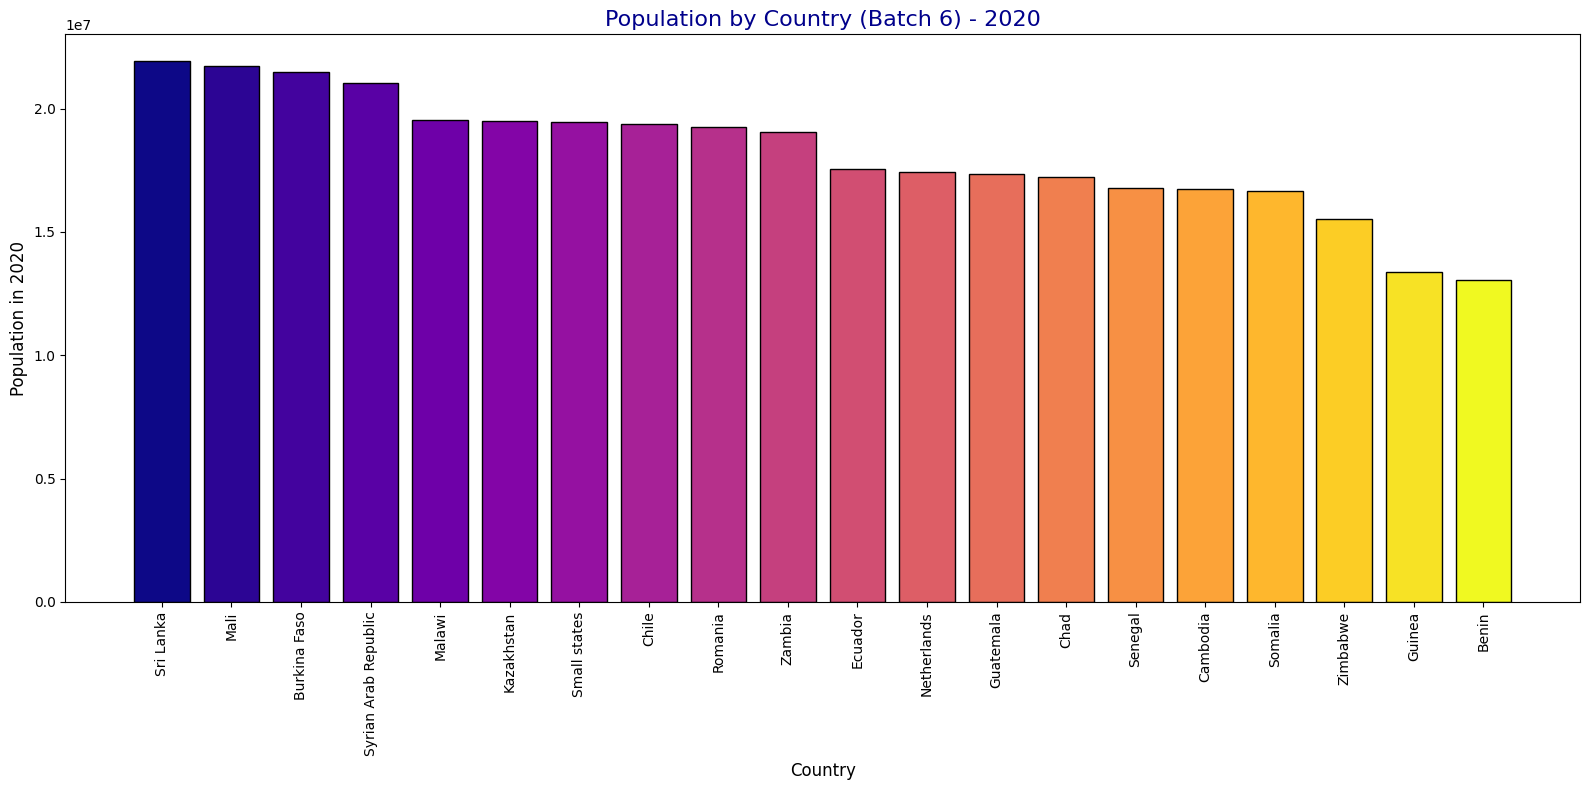

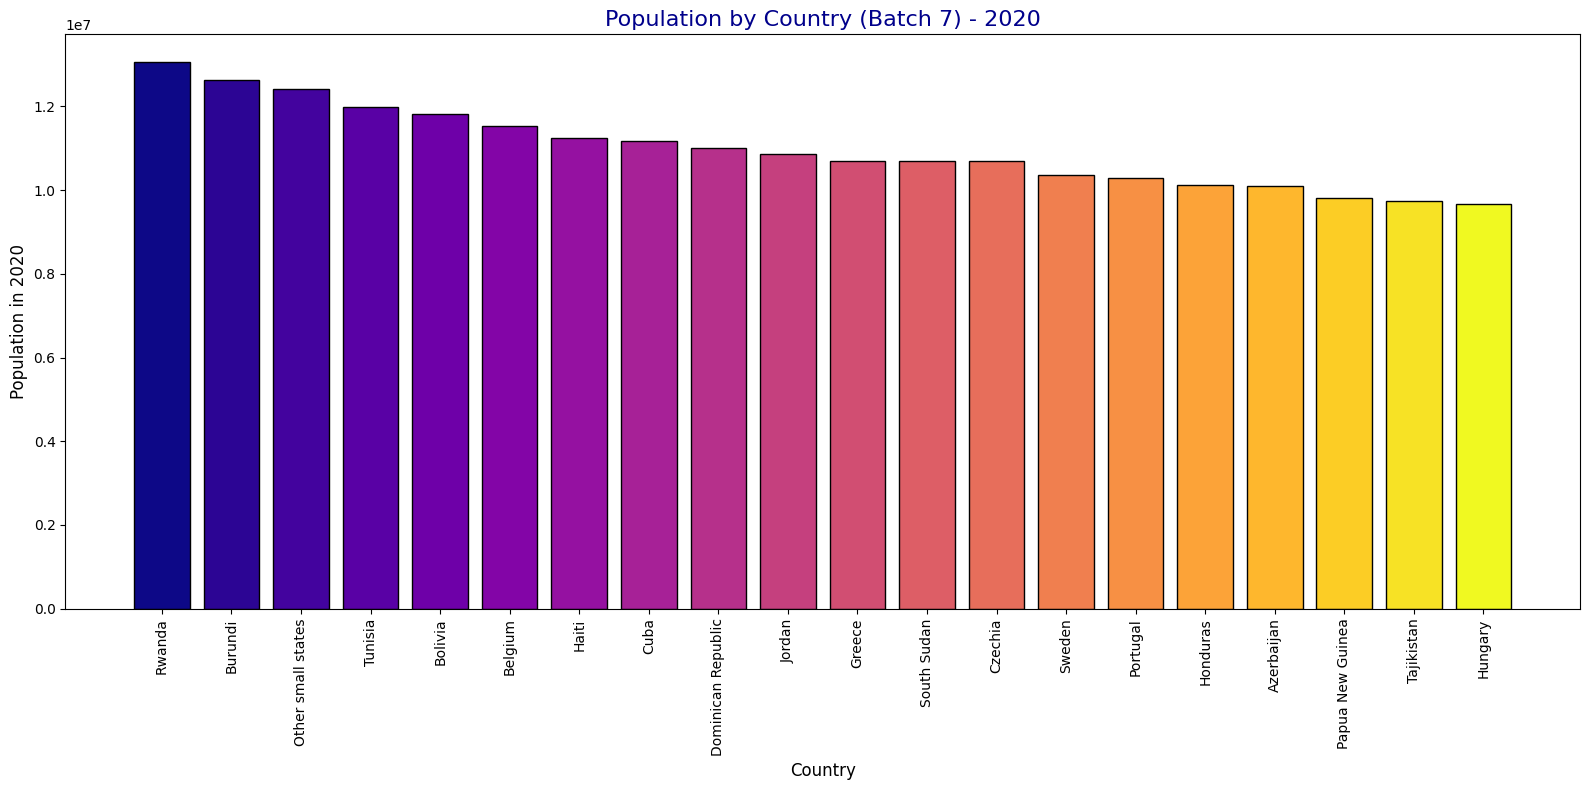

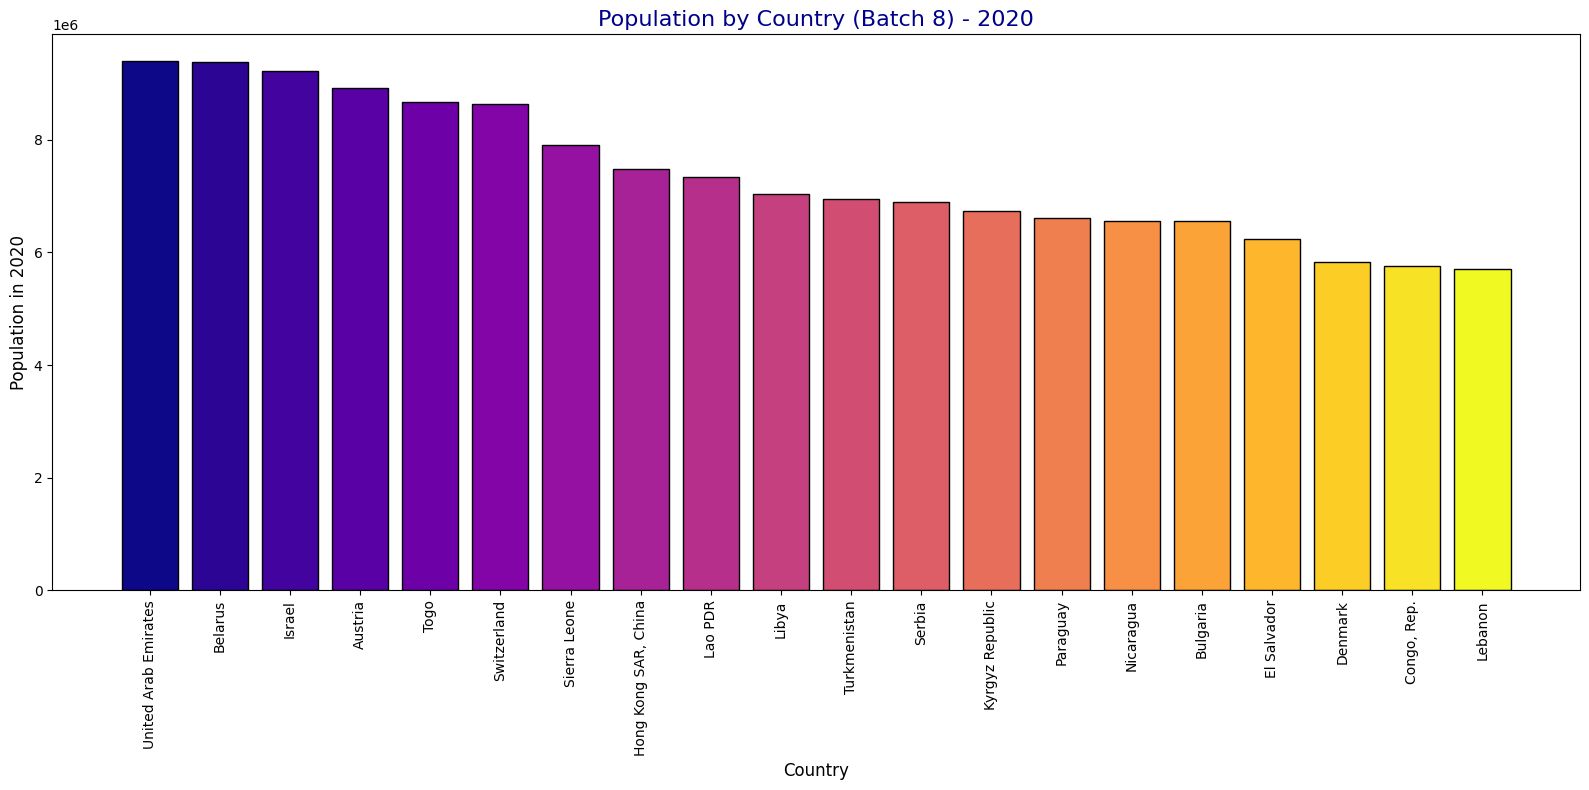

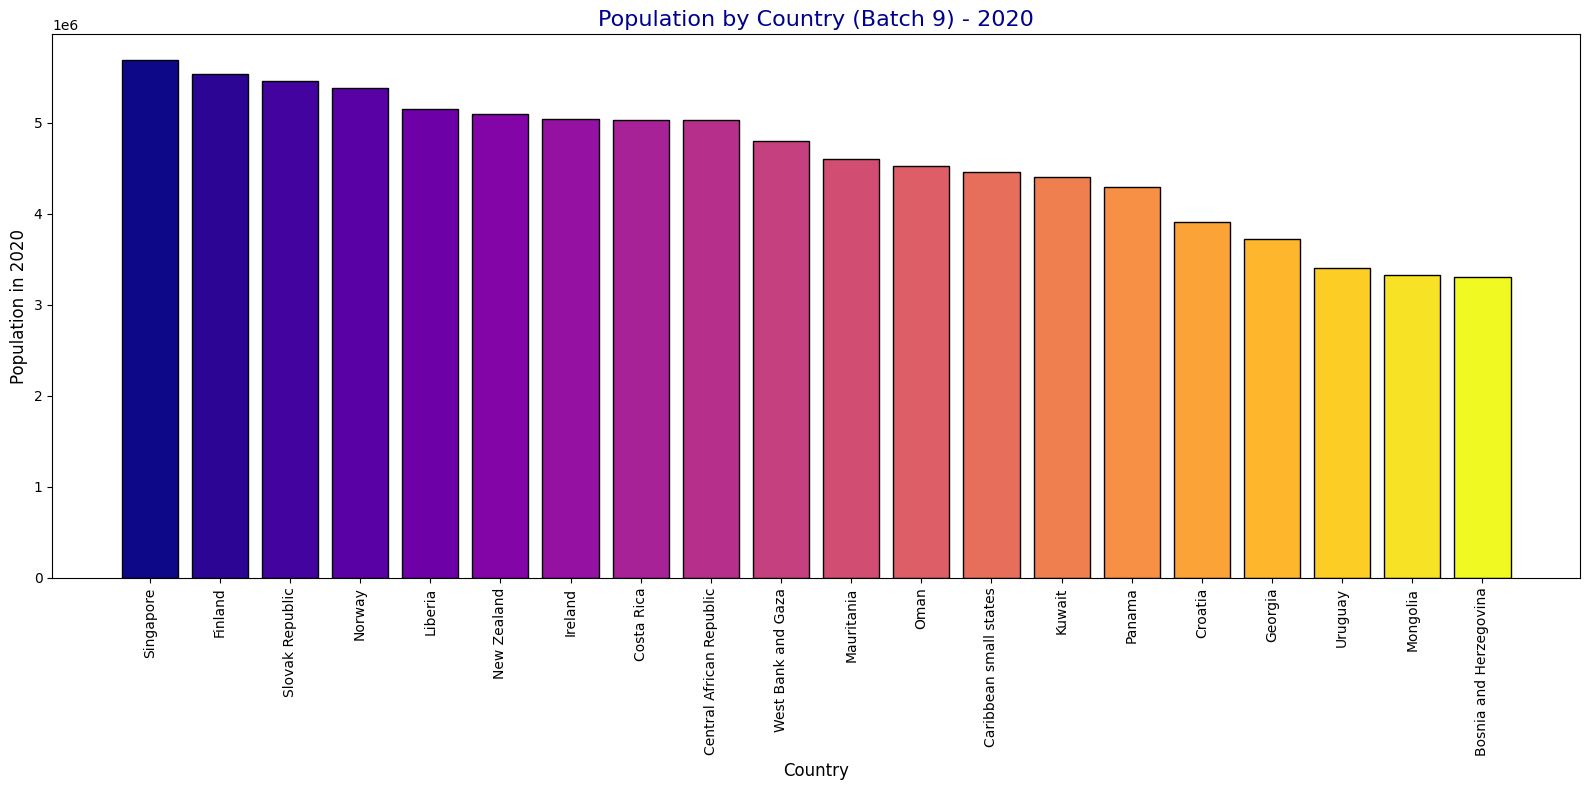

/tmp/ipython-input-21-4004689840.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', len(chunk))


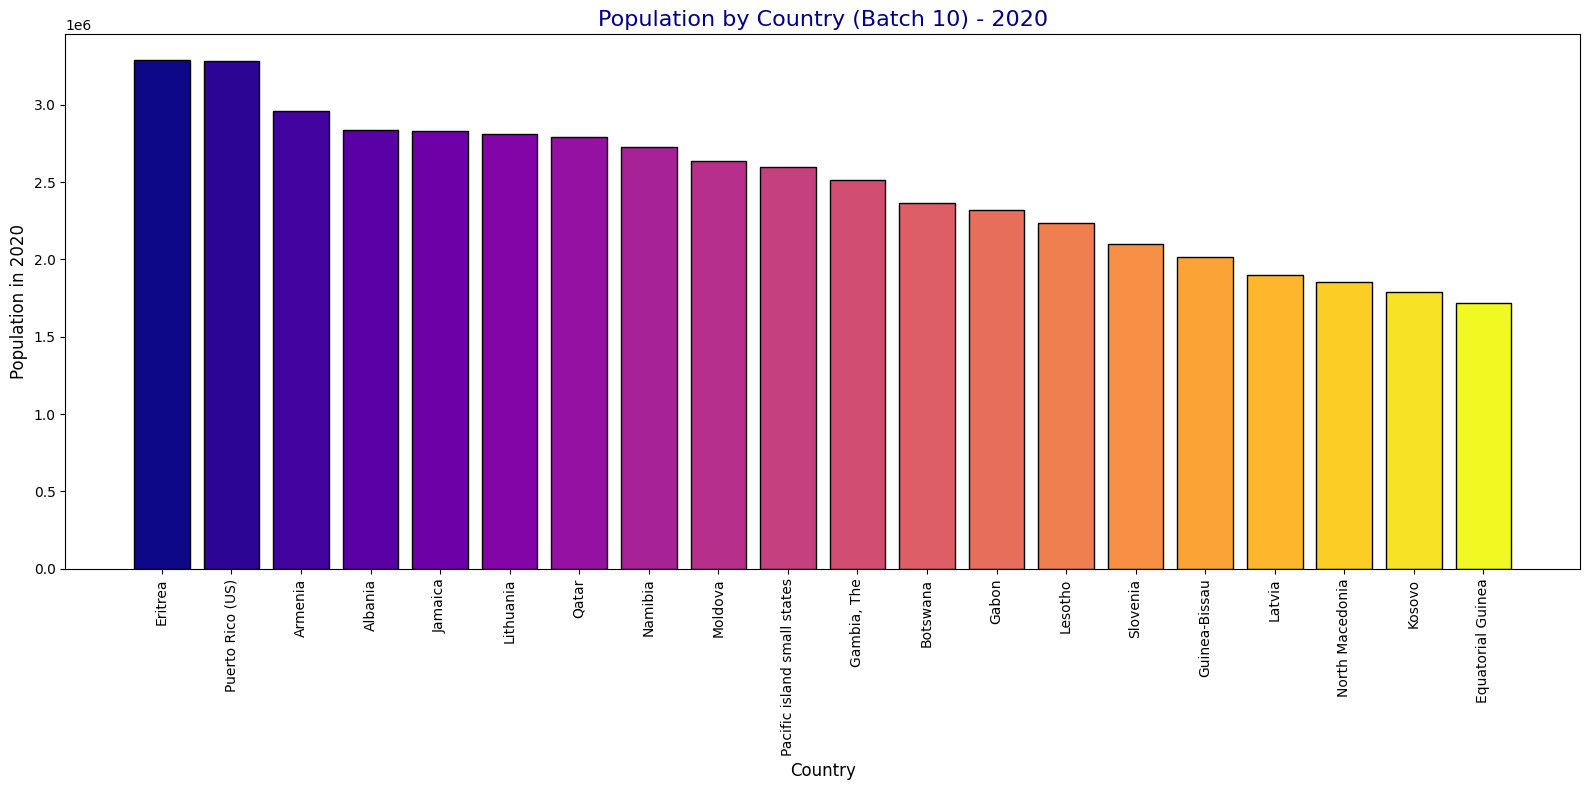

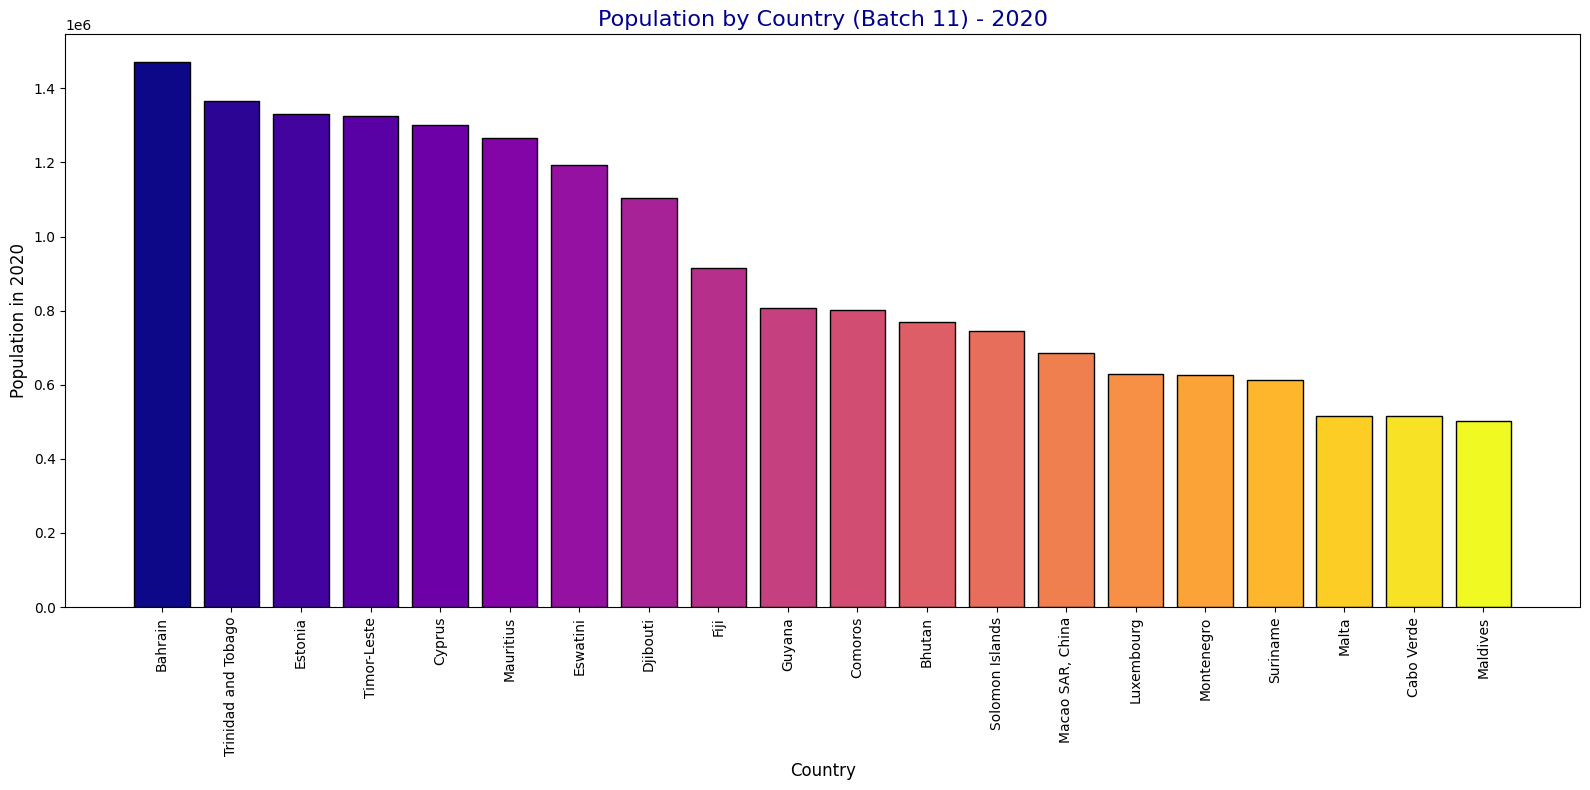

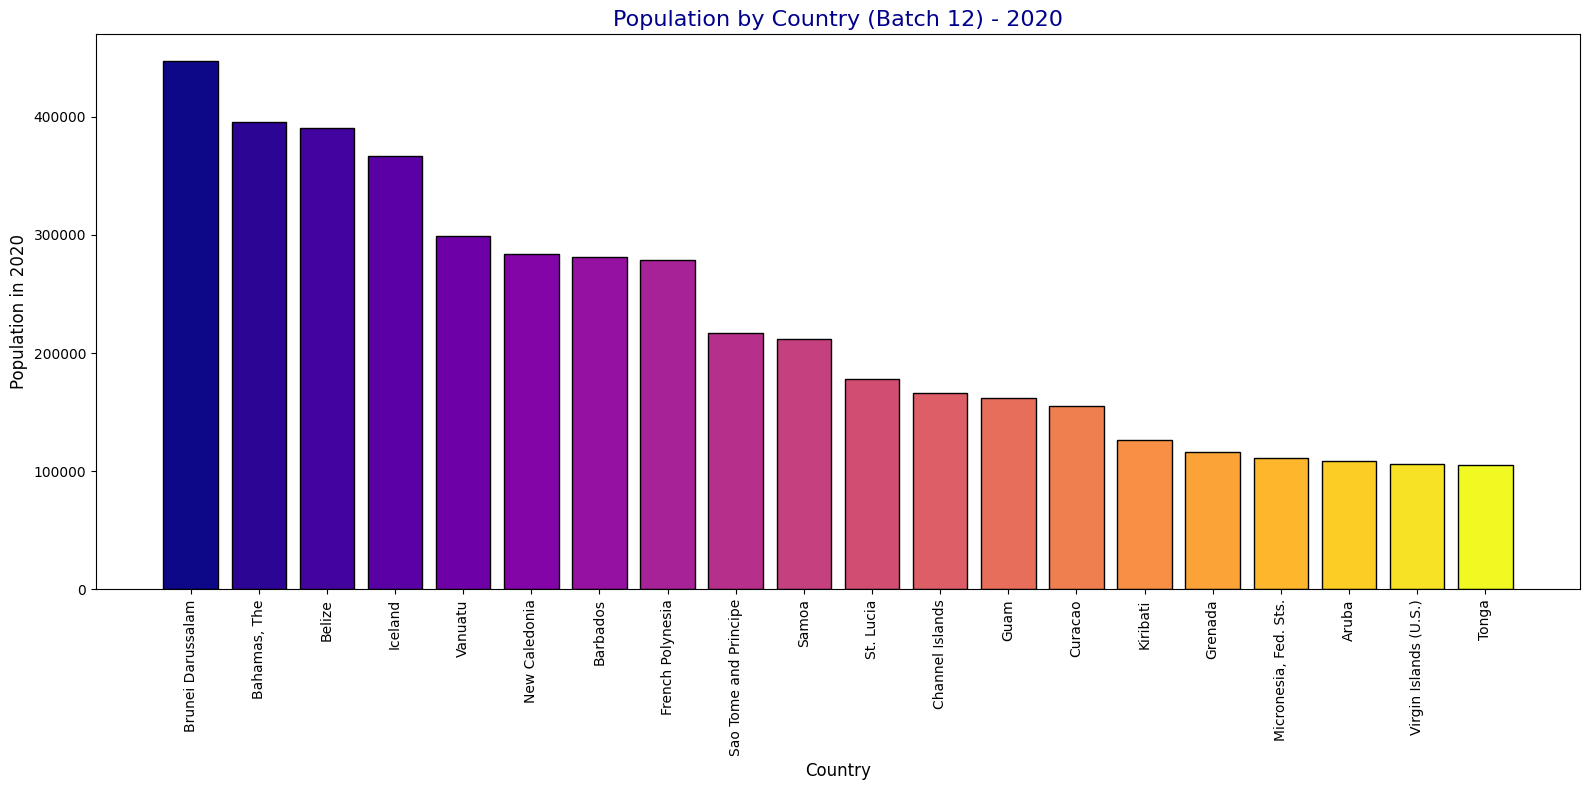

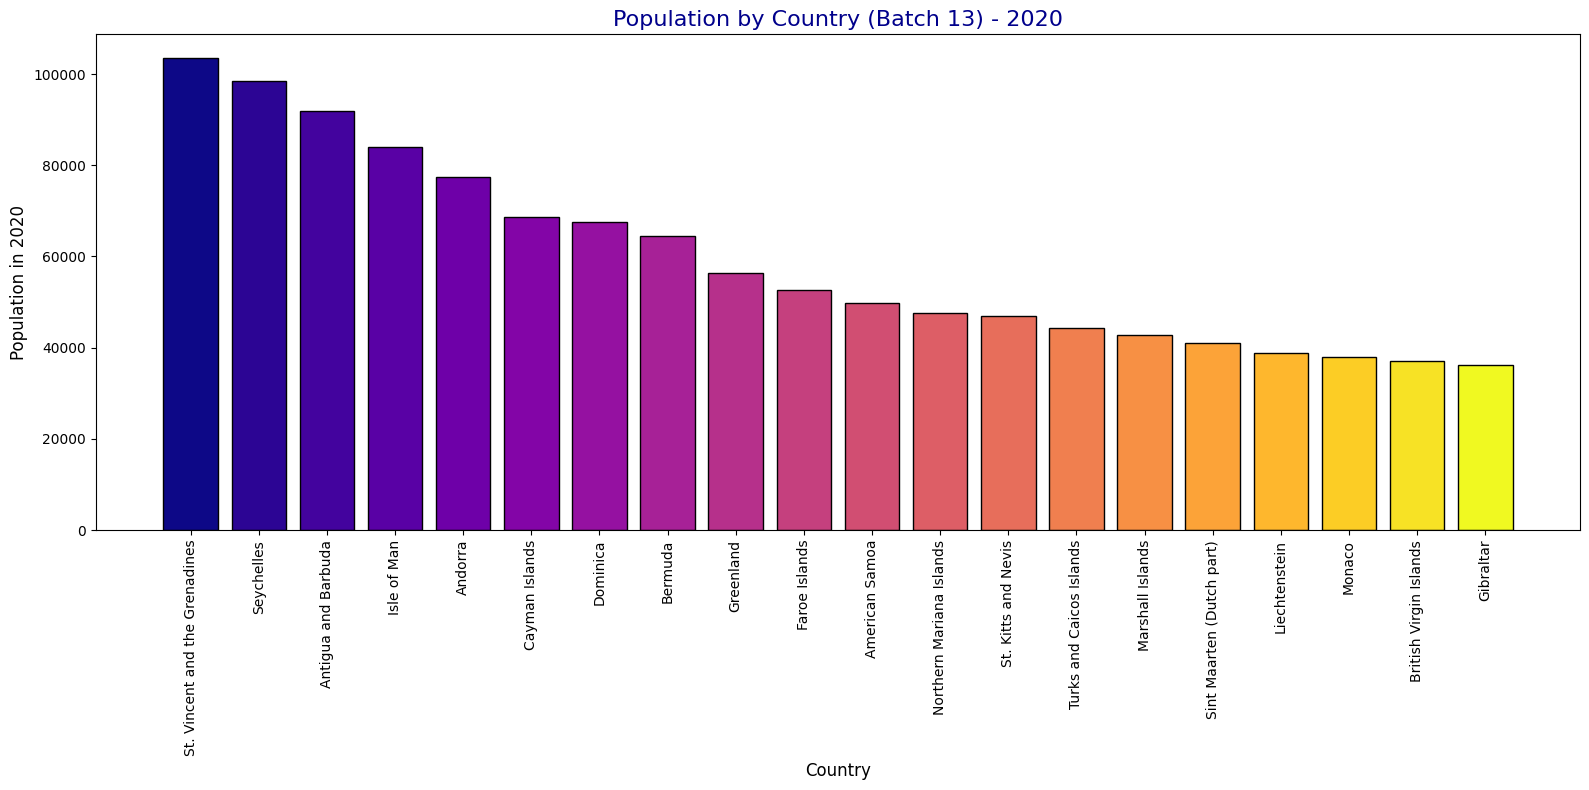

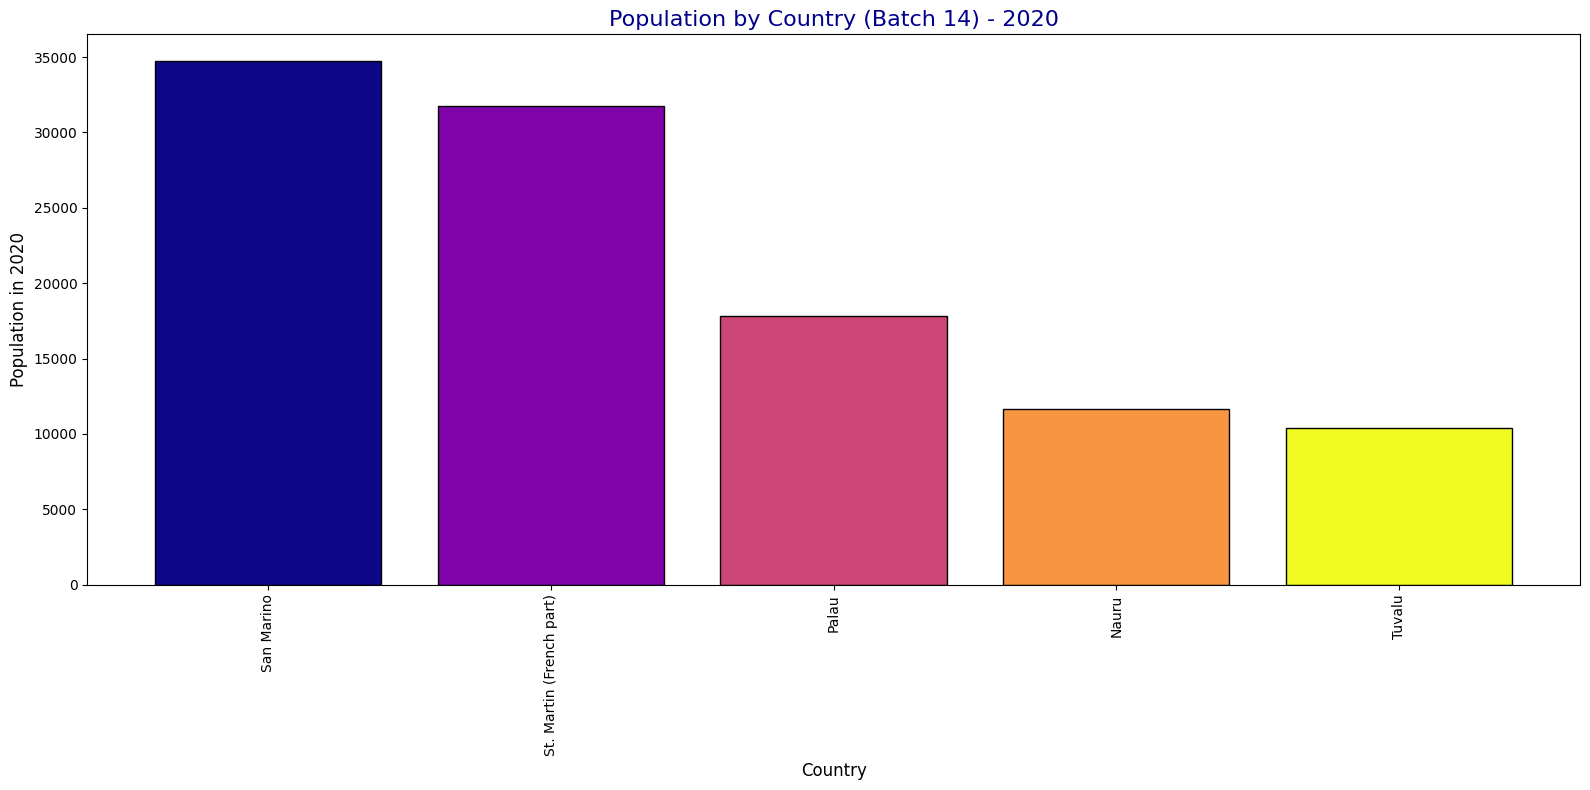

In [ ]:
import math
import matplotlib.cm as cm
import numpy as np

df = pd.DataFrame(data)

years = [str(y) for y in range(1970, 2024)]
columns_to_keep = ['Country Name'] + years
df_decade = df[columns_to_keep]

selected_year = '2020'

df_bar = df_decade[['Country Name', selected_year]].dropna()
df_bar = df_bar[df_bar[selected_year] > 0]
df_bar = df_bar.sort_values(by=selected_year, ascending=False).reset_index(drop=True)

countries_per_chart = 20
total_countries = len(df_bar)
num_charts = math.ceil(total_countries / countries_per_chart)

for i in range(num_charts):
    start = i * countries_per_chart
    end = start + countries_per_chart
    chunk = df_bar.iloc[start:end]

    cmap = cm.get_cmap('plasma', len(chunk))
    colors = [cmap(j) for j in np.linspace(0, 1, len(chunk))]

    plt.figure(figsize=(16, 8))
    plt.bar(chunk['Country Name'], chunk[selected_year], color=colors, edgecolor='black')
    plt.xlabel('Country', fontsize=12)
    plt.ylabel(f'Population in {selected_year}', fontsize=12)
    plt.title(f'Population by Country (Batch {i+1}) - {selected_year}', fontsize=16, color='darkblue')
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

Task-2

/tmp/ipython-input-2-3578139735.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2-3578139735.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      

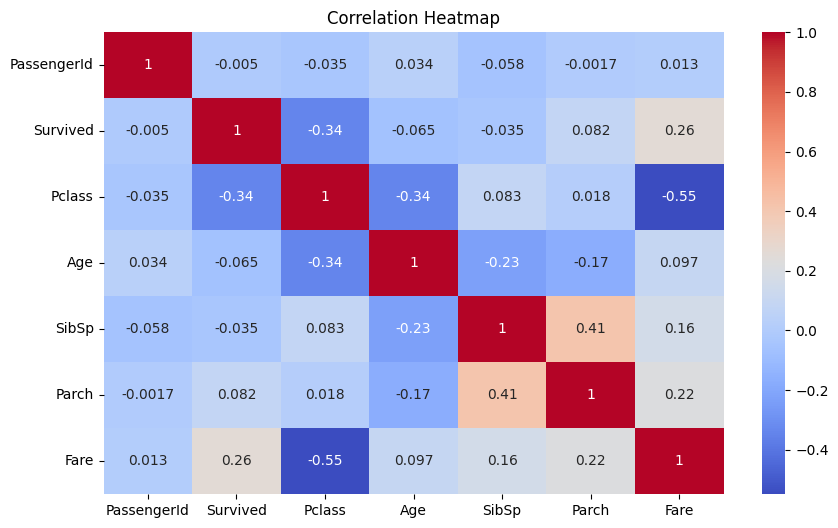

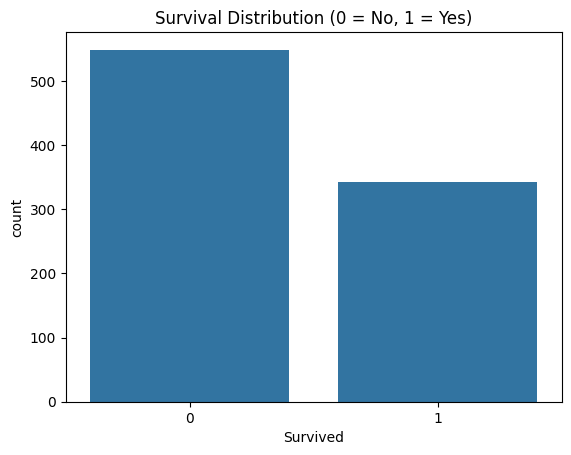

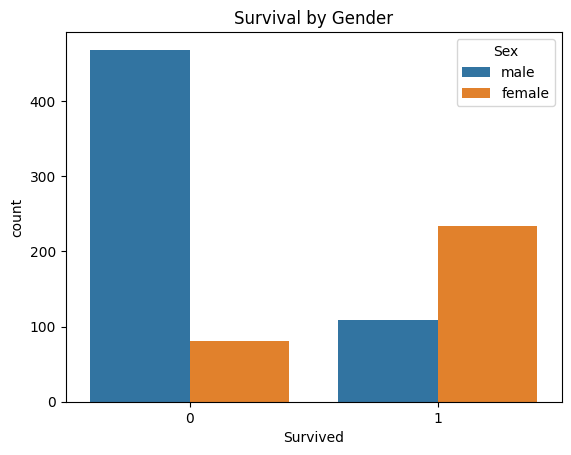

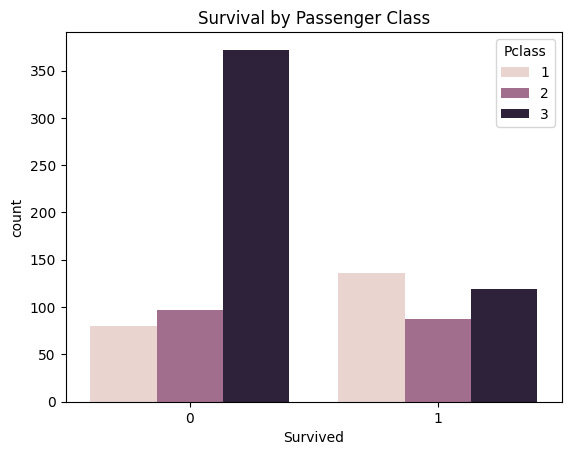

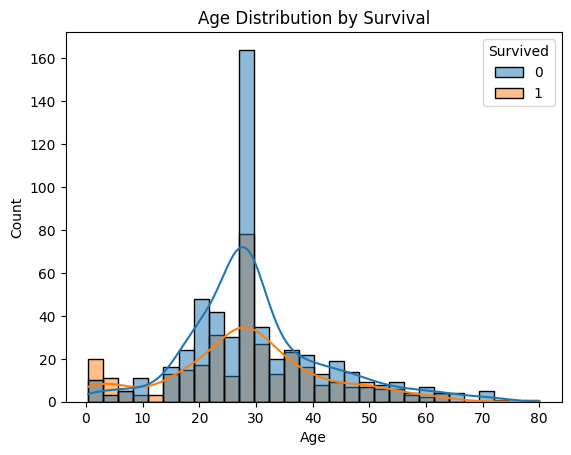

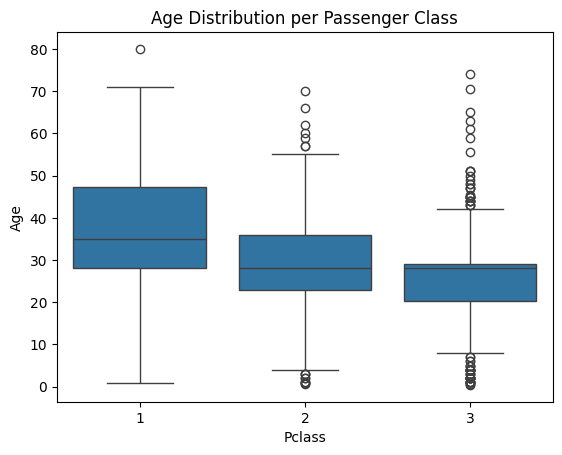

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

print(df.isnull().sum())
print(df.describe())
print(df.info())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution (0 = No, 1 = Yes)")
plt.show()

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution per Passenger Class")
plt.show()

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


Task-2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


print(df.isnull().sum())
print(df.describe())
print(df.info())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602  
std      0.806057   

/tmp/ipython-input-3-3490781300.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-3490781300.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

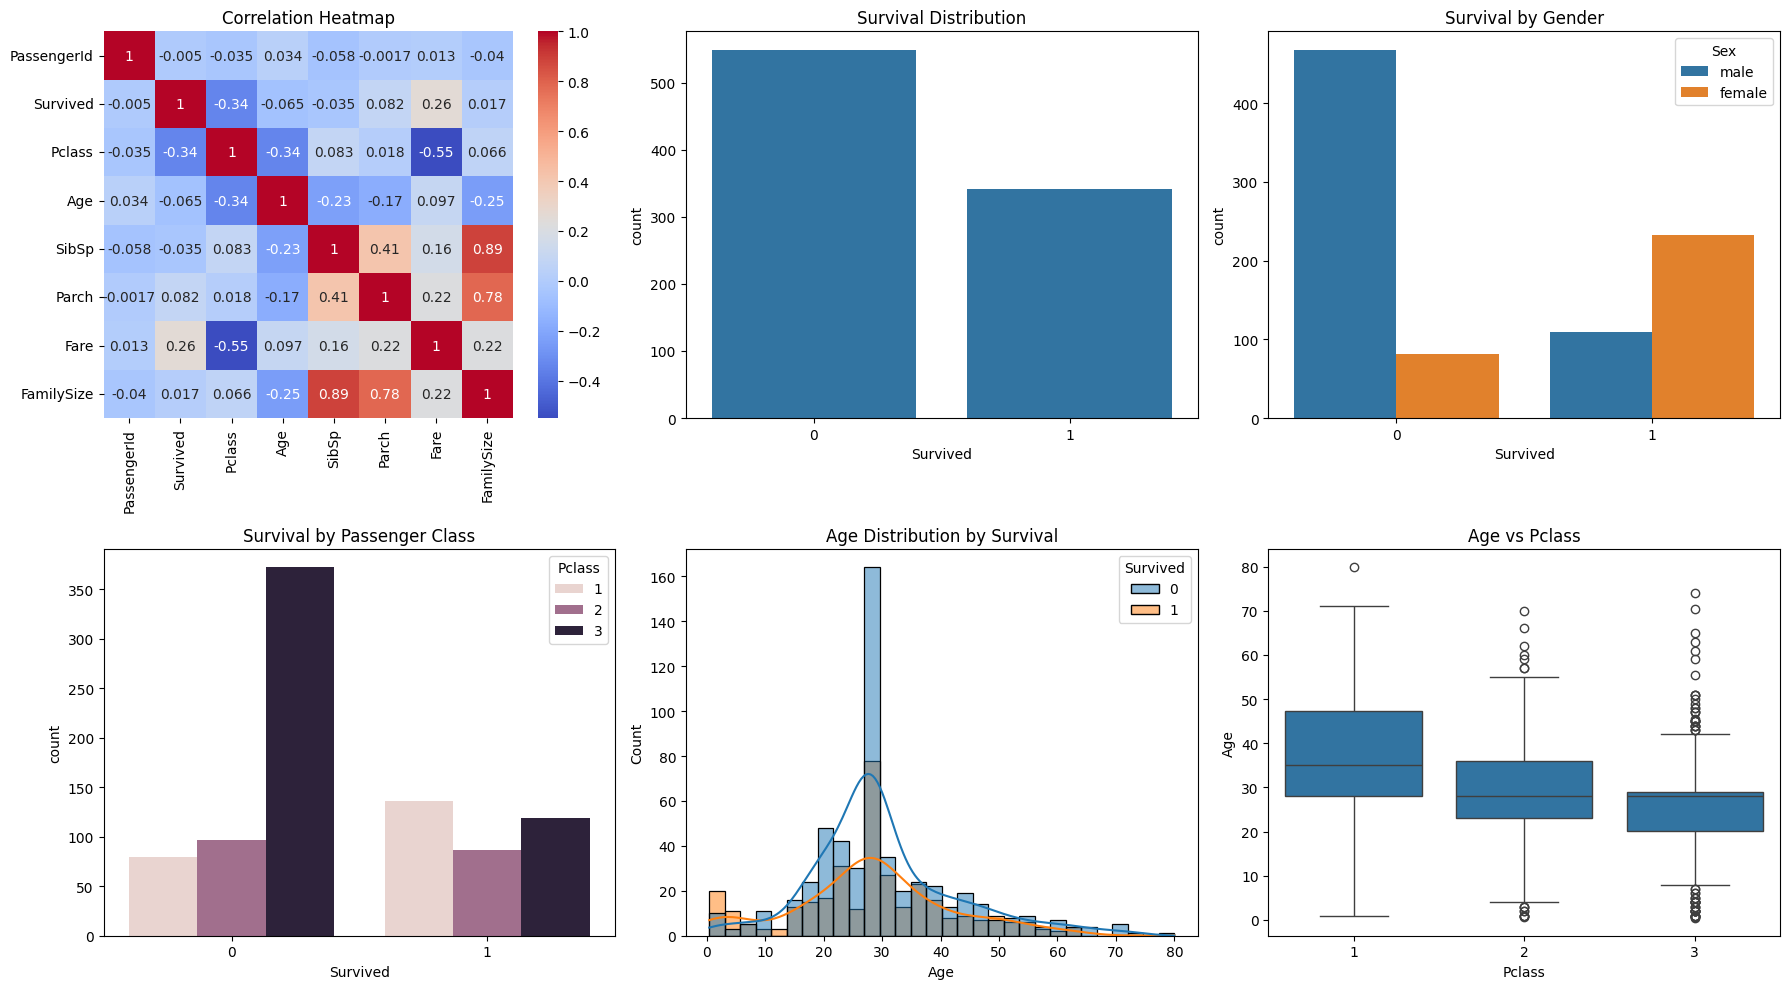

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=axs[0, 0])
axs[0, 0].set_title("Correlation Heatmap")

sns.countplot(x='Survived', data=df, ax=axs[0, 1])
axs[0, 1].set_title("Survival Distribution")

sns.countplot(x='Survived', hue='Sex', data=df, ax=axs[0, 2])
axs[0, 2].set_title("Survival by Gender")

sns.countplot(x='Survived', hue='Pclass', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Survival by Passenger Class")

sns.histplot(data=df, x='Age', hue='Survived', kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Age Distribution by Survival")

sns.boxplot(x='Pclass', y='Age', data=df, ax=axs[1, 2])
axs[1, 2].set_title("Age vs Pclass")

plt.tight_layout()
plt.show()

Task-3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank.csv to bank.csv


Accuracy: 0.8972375690607735

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.54      0.35      0.42        98

    accuracy                           0.90       905
   macro avg       0.73      0.66      0.68       905
weighted avg       0.88      0.90      0.89       905



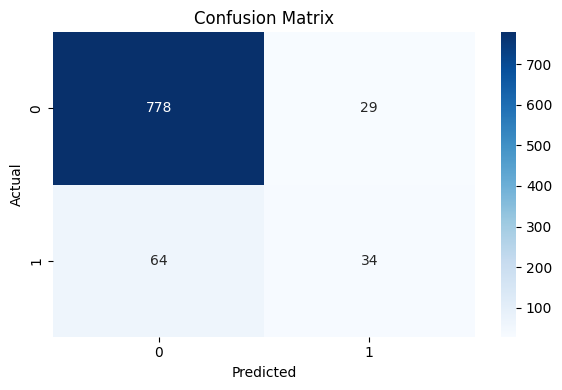

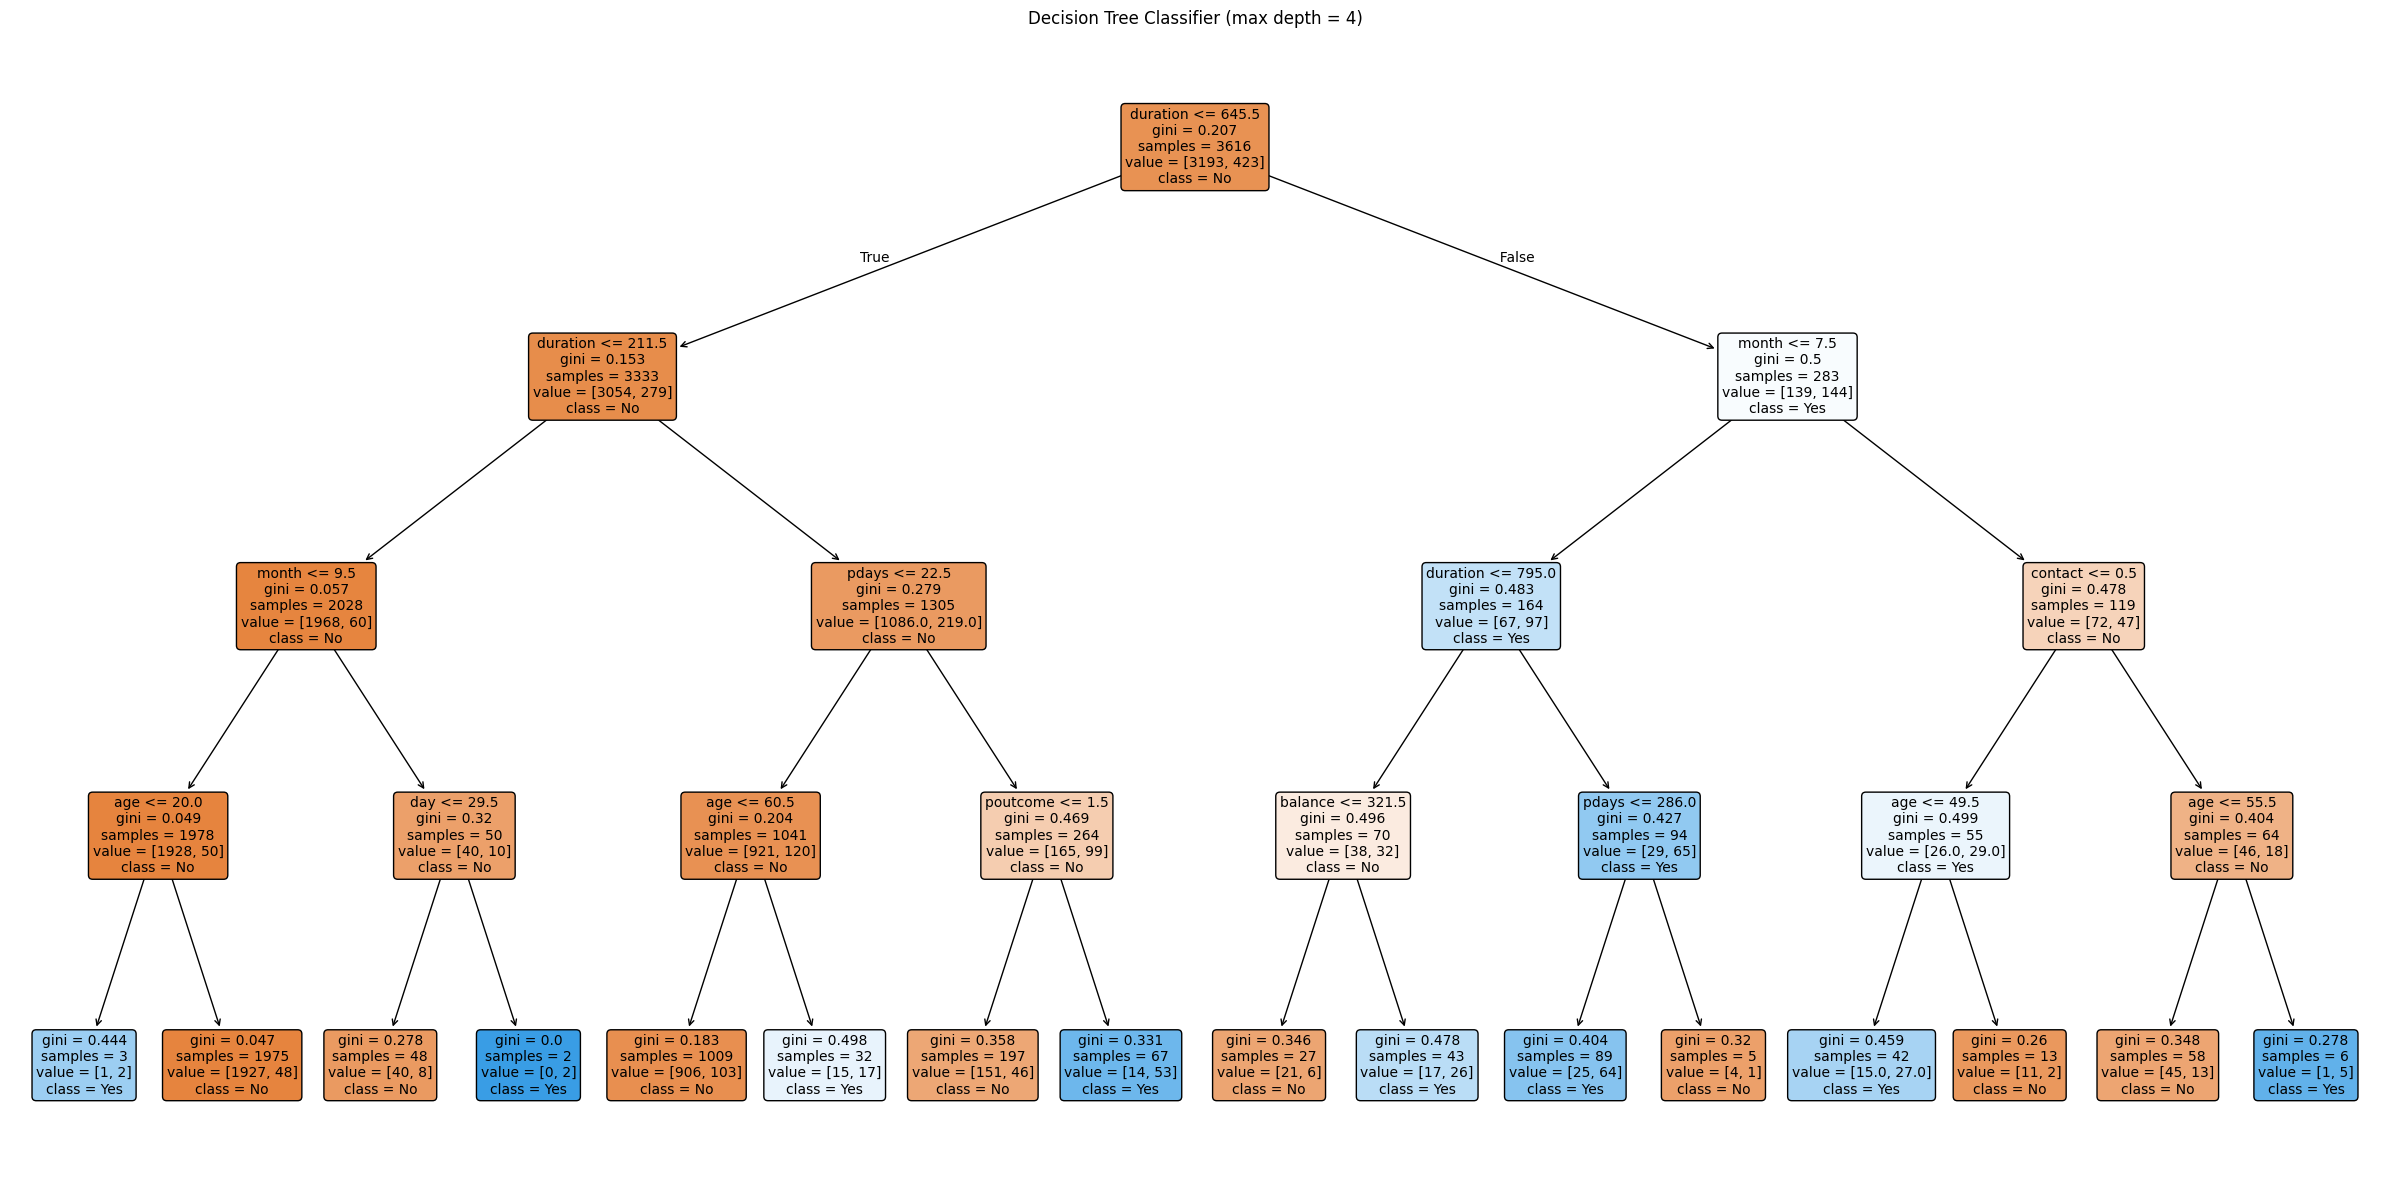

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("bank.csv", sep=';')

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 12))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.title("Decision Tree Classifier (max depth = 4)")
plt.tight_layout()
plt.show()


Task 4


/tmp/ipython-input-3-3548677387.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Predicted_Sentiment", palette="Set2")


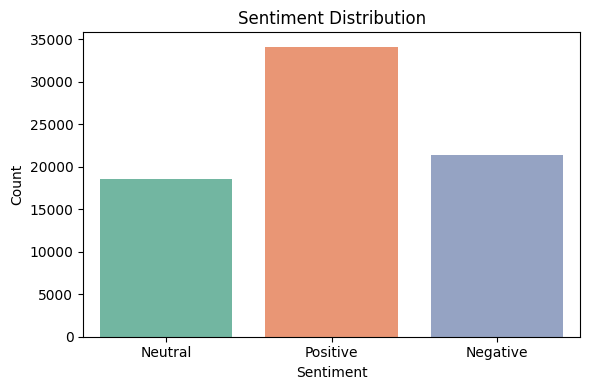

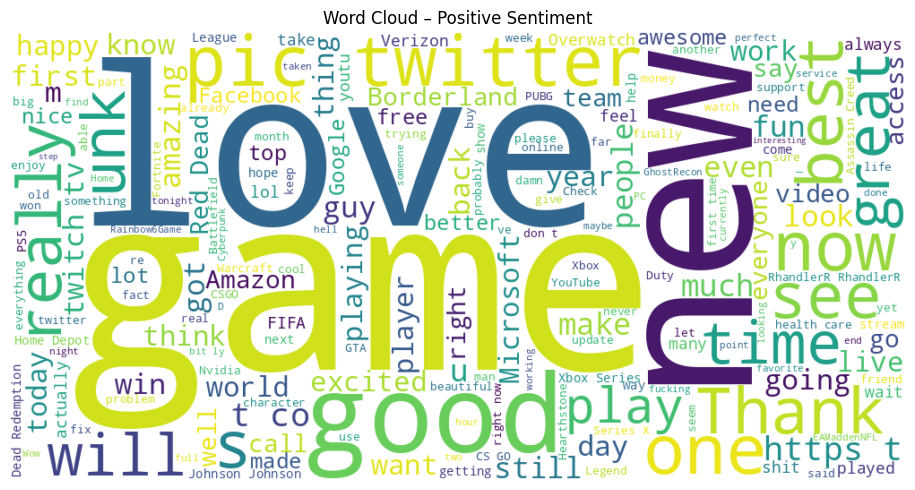

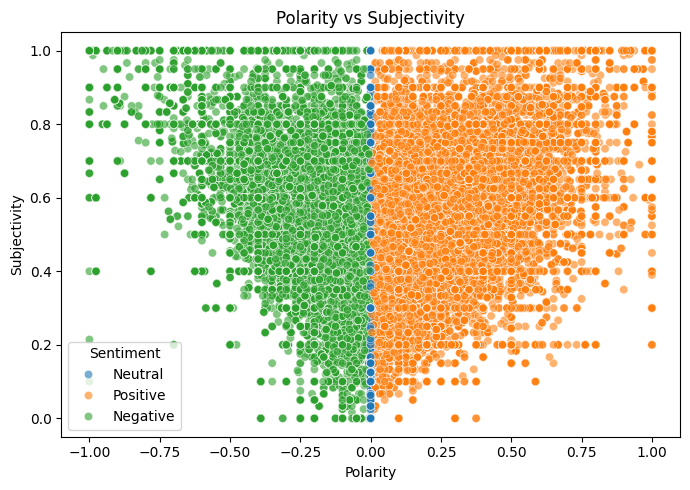

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv("/content/twitter_training.csv", header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']
df.dropna(inplace=True)

df["polarity"] = df["Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["subjectivity"] = df["Text"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

def analyze_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["Predicted_Sentiment"] = df["polarity"].apply(analyze_sentiment)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Predicted_Sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

positive_words = " ".join(df[df["Predicted_Sentiment"] == "Positive"]["Text"].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Positive Sentiment")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="polarity", y="subjectivity", hue="Predicted_Sentiment", alpha=0.6)
plt.title("Polarity vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
